In [49]:
import torch
import torchvision
from torchvision import transforms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [50]:
training_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testing_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True) 

Files already downloaded and verified
Files already downloaded and verified


In [51]:
def pil_to_numpy(dataset):
    images = []
    labels = []
    for image, label in dataset:
        # Convert PIL Image to NumPy array
        image_np = np.array(image)
        images.append(image_np.reshape(-1))
        labels.append(label)
    return np.array(images), np.array(labels)

In [52]:
train_x, train_y = pil_to_numpy(training_dataset)
test_x, test_y = pil_to_numpy(testing_dataset)

train_x = train_x[:10000]
train_y = train_y[:10000]
test_x = test_x[:600]
test_y = test_y[:600]

train_np = train_x.reshape(train_x.shape[0], -1)
test_np = test_x.reshape(test_x.shape[0], -1)


In [53]:
KNN_Cls = KNeighborsClassifier(n_neighbors=5)
KNN_Cls.fit(train_np, train_y)
Prediction = KNN_Cls.predict(test_np)
accuracy = accuracy_score(test_y, Prediction)
print("Accuracy:=", accuracy)

Accuracy:= 0.32


In [54]:
class KNNClassifier:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test, k=1):
        train_x_squarednorms = np.sum(self.X_train**2, axis=1)
        test_x_squarednorms = np.sum(X_test**2, axis=1)[:, np.newaxis]
        dot_product = np.dot(X_test, self.X_train.T)
        product = 2 * dot_product + train_x_squarednorms
        squared_distances = test_x_squarednorms - product
        distances = np.sqrt(squared_distances)

        prediction_of_label = np.zeros(distances.shape[0])
        for i in range(distances.shape[0]):
            pred_x = np.argsort(distances[i])[:k]
            pred_y = self.y_train[pred_x]
            prediction_of_label[i] = np.argmax(np.bincount(pred_y))
        return prediction_of_label

In [55]:
knn = KNNClassifier()
knn.fit(train_np, train_y)
Prediction = knn.predict(test_np,11)
accuracy = accuracy_score(test_y, Prediction)
print("Accuracy:=", accuracy)

Accuracy:= 0.105


Hyper Parameter Tuning

In [56]:
best_accuracy = 0
best_k = 1
listA = []

for k in range(1, 21):
    print("tuning for k = ", k)
    knn = KNNClassifier()
    knn.fit(train_np, train_y)
    Prediction = knn.predict(test_np, k)
    accuracy = accuracy_score(test_y, Prediction)
    listA.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

tuning for k =  1
tuning for k =  2
tuning for k =  3
tuning for k =  4
tuning for k =  5
tuning for k =  6
tuning for k =  7
tuning for k =  8
tuning for k =  9
tuning for k =  10
tuning for k =  11
tuning for k =  12
tuning for k =  13
tuning for k =  14
tuning for k =  15
tuning for k =  16
tuning for k =  17
tuning for k =  18
tuning for k =  19
tuning for k =  20
Best k: 5
Best Accuracy: 0.12


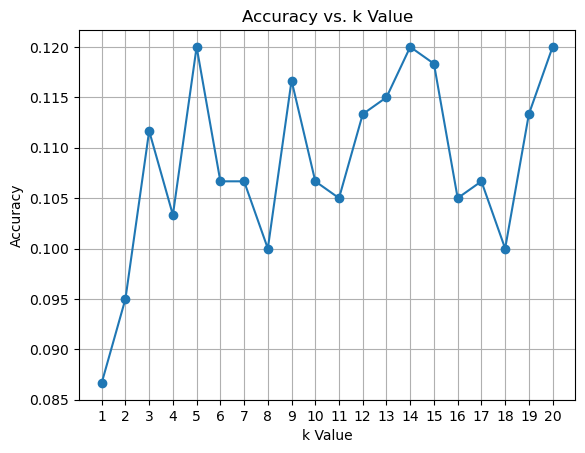

In [57]:
import matplotlib.pyplot as plt

# Plotting comparison image for best k
plt.plot(range(1, 21), listA, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

We first download the dataset, convert the image to numpy array and reduce the dimension of the pixels to a single dimension.
We then use the scikit learn knn clasifier to train the model using the sample train data and test data we got.

once the model is trained we test the model with the testing data sample and find its accuracy for given k

we then define a custom knn model where we take the trainig data and for each testing image vector we get, we find the eucledian distance between the testing image and each and every training image. Thus we get a matrix of distances for each training image to each testing image.

Now using K nearest neighbours we find the label for the given testing image based on the k smallest distanced neighbours for the testing image.

Now K is the hyper parameter here and we tune the hyper parameter to get a better accuracy.

Here in the hyper parameter tuning we check for various values of k and see which k gives the best accuracy for the testing dataset. The K which gives the best accuracy is considered as the tuned parameter.


here a less value of k can be overfitting the answer and highest value can be underfitting. KNN is not a best algorithm for Cifar10 dataset. So we get low accuracies in this case, as we have less samples to train and also model is slow learner as all the testing sets are compared to each and every training set.